In [147]:
import numpy as np
import pandas as pd
pd.options.plotting.backend = "plotly"
from IPython.display import display
import plotly.express as px

In [148]:
fname = "Logdata Essay mini60 2023-10-31.csv"

def load_krp_file(fname):
    nrows = 12
    df_head = pd.read_csv(fname, nrows=nrows, names=["key", "value"])
    df_head = df_head.set_index("key")
    df = pd.read_csv(fname, skiprows=nrows)
    units = df.iloc[0, :]
    units.name = "units"
    cols = df.columns
    df = df.drop(0)
    for col in df.columns:
        df[col] = df[col].astype(float)
    df["Lap"] = ((df["Distance"] - df["Distance"].shift()) < 0).astype(int).cumsum()
    #df["Laptime"] = pd.NaT
    df["Starttime"] = np.where((df["Distance"] - df["Distance"].shift()) < 0, df["Time"], np.NaN)
    #df["Starttime"].iloc[0] = 0
    df.loc[df.index[0], "Starttime"] = 0
    df["Starttime"] = df["Starttime"].ffill()
    #df["Starttime"] = df["Starttime"].fillna(method="ffill")
    df["Laptime"] = df["Time"] - df["Starttime"]

    df["Time"] = pd.to_datetime(df["Time"], unit="s")
    #df["Time"] = pd.to_timedelta(df["Time"], unit="s")

    #df["Laptime"] = pd.to_datetime(df["Laptime"], unit="s")
    
    df = df.set_index("Time")
    laps = df["Lap"].unique()
    
    laptimes = df.groupby("Lap")["Laptime"].last()[0:-1]
    
    return df_head, units.to_frame(), df, laps, laptimes

def get_lap_data(df, lap, index="Laptime"):
    df_lap = df[df["Lap"] == lap]
    df_lap = df_lap.set_index(index)
    return df_lap

def plot_lap_data(df, values="Engine", index="Laptime"):
    df_lap = get_lap_data(df, 0, index)
    fig = px.line(df_lap, x=df_lap.index, y=values, color='Lap')
    for lap in laps[1:]:
        df_lap = get_lap_data(df, lap, index)
        fig.add_scatter(x=df_lap.index, y=df_lap[values], mode='lines', name=str(lap))
    fig.show()

def plot_trajectory(df):
    fig = px.scatter(df, x="PosX", y="PosY", symbol="Lap", hover_name="Laptime")
    fig.show()

df_head, df_units, df, laps, laptimes = load_krp_file(fname)
display(df_head)
display(df_units)
display(df)
display(laptimes.sort_values().to_frame())

value
key                                                       
Format                                     PiBoSo CSV File
Venue                        Circuit International d'Essay
Vehicle                                         CRG Mini60
User                                        Antoine Celles
Data Source                                Kart Racing Pro
Comment                                                NaN
Date                                              10/31/23
Time                                              18:37:43
Sample Rate                                             10
Duration                                           297.298
Segment                                            Session
Beacon Markers  64.470, 122.202, 178.989, 236.464, 293.384

units
Time             s
Distance         m
Engine         rpm
CylHeadTemp      C
WaterTemp        C
Gear           NaN
Speed         km/h
LatAcc           G
LonAcc           G
Steer          deg
Throttle         %
Brake            %
FrontBrakes      %
Clutch           %
YawVel       deg/s
PosX             m
PosY             m

Distance  Engine  CylHeadTemp  WaterTemp  Gear  \
Time                                                                      
1970-01-01 00:00:00.002    43.049  2198.0   124.991264        0.0   0.0   
1970-01-01 00:00:00.101    43.049  2177.0   124.556961        0.0   0.0   
1970-01-01 00:00:00.200    43.049  2176.0   124.134369        0.0   0.0   
1970-01-01 00:00:00.300    43.049  2176.0   123.705948        0.0   0.0   
1970-01-01 00:00:00.400    43.049  2176.0   123.280342        0.0   0.0   
...                           ...     ...          ...        ...   ...   
1970-01-01 00:04:56.900    82.974  8986.0   103.760742        0.0   0.0   
1970-01-01 00:04:57.000    85.098  8750.0   103.411682        0.0   0.0   
1970-01-01 00:04:57.101    87.192  8632.0   103.064720        0.0   0.0   
1970-01-01 00:04:57.200    89.200  8626.0   102.726723        0.0   0.0   
1970-01-01 00:04:57.300    91.201  8355.0   102.383896        0.0   0.0   

                             Speed    LatAcc    LonAcc      Steer   Throttle  \
Time                                                                           
1970-01-01 00:00:00.002   0.070633  0.002549  0.000202  -1.173652  16.666660   
1970-01-01 00:00:00.101   0.545799  0.001613  0.014398  -1.173652  18.562508   
1970-01-01 00:00:00.200   0.501256 -0.008634  0.023318  -1.173652  18.588047   
1970-01-01 00:00:00.300   0.304337 -0.000904  0.016425  -1.173652  18.588333   
1970-01-01 00:00:00.400   0.155313  0.007863  0.012276  -1.173652  18.588333   
...                            ...       ...       ...        ...        ...   
1970-01-01 00:04:56.900  65.771088  1.100487 -0.324477  12.073339   0.000000   
1970-01-01 00:04:57.000  64.806839  0.658116 -0.194999  10.702374   0.000000   
1970-01-01 00:04:57.101  63.726986  1.066653 -0.374704  12.521113   0.000000   
1970-01-01 00:04:57.200  62.621548  1.032367 -0.257688  11.918552   0.000000   
1970-01-01 00:04:57.300  61.656729  0.927830 -0.327591  13.350327   0.000000   

                           Brake  FrontBrakes  Clutch     YawVel       PosX  \
Time                                                                          
1970-01-01 00:00:00.002  0.00000          0.0     0.0   0.000484  35.729687   
1970-01-01 00:00:00.101  0.00000          0.0     0.0   0.059395  35.729839   
1970-01-01 00:00:00.200  0.00000          0.0     0.0  -0.042611  35.729771   
1970-01-01 00:00:00.300  0.00000          0.0     0.0  -0.009988  35.729748   
1970-01-01 00:00:00.400  0.00000          0.0     0.0  -0.037215  35.729797   
...                          ...          ...     ...        ...        ...   
1970-01-01 00:04:56.900  1.17302          0.0     0.0  28.847034  71.743393   
1970-01-01 00:04:57.000  1.17302          0.0     0.0  23.109797  72.994591   
1970-01-01 00:04:57.101  1.17302          0.0     0.0  36.464943  74.173767   
1970-01-01 00:04:57.200  1.17302          0.0     0.0  27.381901  75.233452   
1970-01-01 00:04:57.300  1.17302          0.0     0.0  36.080498  76.222321   

                               PosY  Lap  Starttime  Laptime  
Time                                                          
1970-01-01 00:00:00.002  136.618561    0      0.000    0.002  
1970-01-01 00:00:00.101  136.618393    0      0.000    0.101  
1970-01-01 00:00:00.200  136.617615    0      0.000    0.200  
1970-01-01 00:00:00.300  136.616974    0      0.000    0.300  
1970-01-01 00:00:00.400  136.615738    0      0.000    0.400  
...                             ...  ...        ...      ...  
1970-01-01 00:04:56.900   98.704651    5    293.401    3.499  
1970-01-01 00:04:57.000   97.395935    5    293.401    3.599  
1970-01-01 00:04:57.101   96.055145    5    293.401    3.700  
1970-01-01 00:04:57.200   94.702423    5    293.401    3.799  
1970-01-01 00:04:57.300   93.289101    5    293.401    3.899  

[2974 rows x 19 columns]

Laptime
Lap         
2     56.600
4     56.799
3     57.401
1     57.699
0     64.401

In [149]:
df["Distance"].plot()

In [150]:
df["Engine"].plot()

In [151]:
plot_lap_data(df, "Engine")

In [152]:
data_cols = df.columns.drop(["Distance", "Lap", "Laptime", "Starttime", "PosX", "PosY"])
data_cols

Index(['Engine', 'CylHeadTemp', 'WaterTemp', 'Gear', 'Speed', 'LatAcc',
       'LonAcc', 'Steer', 'Throttle', 'Brake', 'FrontBrakes', 'Clutch',
       'YawVel'],
      dtype='object')

In [153]:
from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [154]:
for data_col in data_cols:
    plot_lap_data(df, data_col)

In [155]:
plot_trajectory(df)

In [156]:
for data_col in data_cols:
    plot_lap_data(df, data_col, "Distance")

In [157]:
best_lap = laptimes.sort_values().index[0]
print(f"best lap: {best_lap}")

best lap: 2


In [158]:
df_best_lap = get_lap_data(df, best_lap, index="Laptime")
engine = df_best_lap["Engine"]
engine.hist(bins=10)

In [159]:
rpm_min, rpm_max = 5000, 15000
bins = 50
rpm_step = (rpm_max - rpm_min) / bins
y, x = np.histogram(engine.values, bins=bins, range=(rpm_min, rpm_max), density=True, weights=None)
s = pd.Series(y, index=x[1:], name="Engine (rpm)")
s.plot.bar()

In [160]:
#df_engine = pd.DataFrame({"Prob (%)": y}, index=x[1:])
#df_engine.index.name = "Engine (RPM)"
#df_engine["Prob (%)"] = df_engine["Prob (%)"] * rpm_step
#s = df_engine["Prob (%)"]
#s
s = pd.Series(y, index=x[1:], name=f"Lap {best_lap}")
s.index.name = "Engine (rpm)"
s = s * rpm_step
assert s.sum() == 1.0
fig = s.plot.barh()
fig

In [161]:
df_best_lap["CalcAcc"] = df_best_lap["Speed"].diff() / df_best_lap.index.to_series().diff() / (3.6 * 9.81)
df_best_lap

Distance   Engine  CylHeadTemp  WaterTemp  Gear      Speed    LatAcc  \
Laptime                                                                         
0.000       2.445  12702.0   110.710464        0.0   0.0  90.391766  0.032213   
0.101       5.009  12679.0   110.730103        0.0   0.0  90.653082  0.024444   
0.201       7.529  12694.0   110.747704        0.0   0.0  90.904724  0.025200   
0.301      10.057  12792.0   110.764229        0.0   0.0  91.105740  0.016652   
0.401      12.591  12791.0   110.779396        0.0   0.0  91.356963 -0.001805   
...           ...      ...          ...        ...   ...        ...       ...   
56.201   1197.869  12490.0   110.775757        0.0   0.0  88.949103 -0.083788   
56.301   1200.341  12512.0   110.795891        0.0   0.0  89.193466 -0.092834   
56.401   1202.820  12539.0   110.815109        0.0   0.0  89.421831 -0.104023   
56.501   1205.306  12587.0   110.833015        0.0   0.0  89.647222 -0.056662   
56.600   1207.798  12579.0   110.850365        0.0   0.0  89.889381 -0.033142   

           LonAcc     Steer  Throttle  Brake  FrontBrakes  Clutch    YawVel  \
Laptime                                                                       
0.000    0.069321  0.315101     100.0    0.0          0.0     0.0  0.555077   
0.101    0.041675  0.292989     100.0    0.0          0.0     0.0  0.816149   
0.201    0.080162  0.138202     100.0    0.0          0.0     0.0  0.241627   
0.301    0.055910 -0.021835     100.0    0.0          0.0     0.0 -0.414075   
0.401    0.052692 -0.087342     100.0    0.0          0.0     0.0 -0.237467   
...           ...       ...       ...    ...          ...     ...       ...   
56.201   0.063346 -0.840662     100.0    0.0          0.0     0.0 -1.956474   
56.301   0.064229 -0.884333     100.0    0.0          0.0     0.0 -2.007340   
56.401   0.060044 -0.993510     100.0    0.0          0.0     0.0 -2.864645   
56.501   0.062695 -0.349366     100.0    0.0          0.0     0.0 -0.785451   
56.600   0.053175 -0.398496     100.0    0.0          0.0     0.0 -1.084425   

              PosX        PosY  Lap  Starttime   CalcAcc  
Laptime                                                   
0.000    -4.925309  110.969063    2      122.3       NaN  
0.101    -2.361490  110.963676    2      122.3  0.073261  
0.201     0.158641  110.955841    2      122.3  0.071254  
0.301     2.686095  110.946304    2      122.3  0.056919  
0.401     5.219952  110.936356    2      122.3  0.071136  
...            ...         ...  ...        ...       ...  
56.201  -19.531469  110.951454    2      122.3  0.064222  
56.301  -17.058992  110.946068    2      122.3  0.069193  
56.401  -14.579880  110.950249    2      122.3  0.064663  
56.501  -12.094447  110.964378    2      122.3  0.063821  
56.600   -9.602525  110.984604    2      122.3  0.069262  

[567 rows x 19 columns]

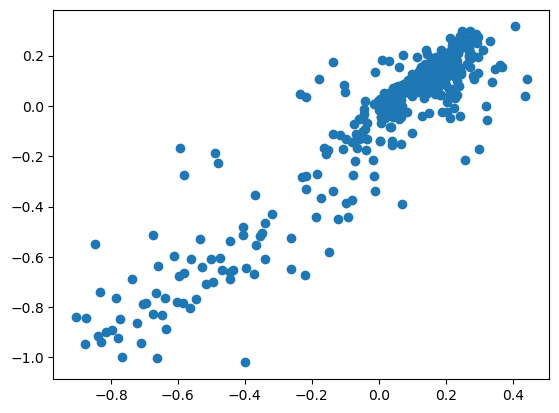

In [162]:
import matplotlib.pyplot as plt
plt.scatter(df_best_lap["LonAcc"], df_best_lap["CalcAcc"])